## Imports

In [1]:
import time
start = time.time()

In [2]:
# Import the necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from IPython.core.pylabtools import figsize

# Data Cleaning and Formatting

## Loading Data

In [3]:
# Reading the file
game_stats = pd.read_csv("game_stats.csv")

In [4]:
game_stats.head()

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
0,Gloomhaven,1,174430,2017,1,4,120,60,120,33539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pandemic Legacy: Season 1,2,161936,2015,2,4,60,60,60,45392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Through the Ages: A New Story of Civilization,3,182028,2015,2,4,240,180,240,17656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Terraforming Mars,4,167791,2016,1,5,120,120,120,40782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twilight Struggle,5,12333,2005,2,2,180,120,180,44884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Types

In [5]:
game_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 59 columns):
Name                           16300 non-null object
Rank                           16300 non-null int64
ID                             16300 non-null int64
Year Published                 16300 non-null int64
Min Players                    16300 non-null int64
Max Players                    16300 non-null int64
Playing Time                   16300 non-null int64
Min Playing Time               16300 non-null int64
Max Playing Time               16300 non-null int64
Owned                          16300 non-null int64
Users Rated                    16300 non-null int64
Average Rating                 16300 non-null float64
Bayes Average Rating           16300 non-null float64
Age                            16300 non-null int64
Complexity Rating              16300 non-null float64
Comments                       16300 non-null int64
Wishing                        16300 non-null int64


## Missing data and Outliers

### Check for missing values

In [6]:
for column in game_stats.columns:
    if game_stats[column].isnull().sum()>0:
        print(str(column)+ " " +  str(game_stats[column].isnull().sum()) + " " +
              str(game_stats[column].isnull().sum()/len(game_stats)*100))
#         if (game_stats[column].isnull().sum()/len(game_stats)*100 < 80):
#             print(str(column)+ " " +  str(game_stats[column].isnull().sum()) + " " +
#                   str(game_stats[column].isnull().sum()/len(game_stats)*100))

Num Players Recommended 5883 36.0920245398773
Num Players Best 990 6.073619631901841
Thematic Rank 15325 94.01840490797547
Strategy Game Rank 14478 88.82208588957056
Num Players Not Recommended 6131 37.61349693251534
War Game Rank 13452 82.52760736196319
Customizable Rank 16023 98.30061349693253
Abstract Game Rank 15373 94.31288343558282
Family Game Rank 14586 89.48466257668711
Party Game Rank 15815 97.02453987730061
Children's Game Rank 15590 95.6441717791411
RPG Item Rank 16299 99.99386503067484
Accessory Rank 16299 99.99386503067484
Video Game Rank 16299 99.99386503067484
Amiga Rank 16299 99.99386503067484
Commodore 64 Rank 16299 99.99386503067484
Arcade Rank 16299 99.99386503067484
Atari ST Rank 16299 99.99386503067484


The columns with rank are expected to have missing values since all the games dont belong to all categories. And the num players columns are dependent on the poll taken by users, thus it might have missing values. 

In [7]:
game_stats[~game_stats['Video Game Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
11189,Ataxx,11190,91313,1990,0,0,0,0,0,17,...,NaN,NaN,NaN,NaN,NaN,4514.0,185.0,136.0,137.0,111.0


In [8]:
game_stats[~game_stats['RPG Item Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
1047,Legacy of Dragonholt,1048,234669,2017,1,6,999,60,999,2997,...,NaN,NaN,NaN,334.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
game_stats[~game_stats['Accessory Rank'].isnull()]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Family Game Rank,Party Game Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
3830,Miscellaneous Game Accessory,3831,5985,0,0,0,0,0,0,1076,...,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN


<b>Conclusion</b>

The given 5 columns only have one row: 'Video Game Rank', 'Amiga Rank', 'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank' 
and they all belong to the same row.

The following columns have one row each as well and can be ignored for the purpose of our analysis: RPG Item Rank, Accessory Rank

In [10]:
game_stats.drop(['Video Game Rank', 'Amiga Rank', 'Commodore 64 Rank', 'Arcade Rank', 
                 'Atari ST Rank', 'RPG Item Rank', 'Accessory Rank'], axis=1, inplace=True)

### Getting unique values in all columns

In [11]:
for column in game_stats.columns:
    print(column)
    print(len(game_stats[column].unique()))
    print(game_stats[column].unique())

Name
15991
['Gloomhaven' 'Pandemic Legacy: Season 1'
 'Through the Ages: A New Story of Civilization' ... 'Nero' 'Coaster Park'
 'Uncle Wiggily']
Rank
16300
[    1     2     3 ... 16298 16299 16300]
ID
16300
[174430 161936 182028 ...   4367 232895   3074]
Year Published
175
[ 2017  2015  2016  2005  2012  2011  2002  2013  2007  2014  2006  2004
  2008  2018  2010  1995  2009  1981  1997  1876  1999  1991  2000 -2200
  2003  1996  1993  1986  1998  2001  1985  1964  1992  1979  1980  1982
  1994  1990  1983  1475  1989  1977  1959  1925  1630  1800  1850  1984
  1988  1987  1810  1971  1978   762  1974  1000 -3000  1973  1962     0
  1848  1947  1938  1903  1948  1895  1960  1976  1745  1967  1930  1864
  1906  1972  1970  1975  1946  1966  1965  1883   400  1969  1701  1942
  1600  1430  1963  1939  1904  1932  1780  1968  1909   700  1921  1870
  1956  1663  1951  2019  1715  1885  1425   550  1955  1860  1958  1680
  1796 -3500  1890  1830  1887  1889  1954  1892  1881  1911  1802  

["['Isaac Childres']" "['Rob Daviau', 'Matt Leacock']"
 "['Vlaada Chvátil']" ... "['Dee Pomerleau']"
 "['Jeff Colthorpe', 'Barry Hobbs', 'Ed Moitoso', 'Mark Sutcliffe']"
 "['Howard R. Garis']"]
Game Family
5672
["['Campaign Games', 'Components: Miniatures', 'Crowdfunding: Kickstarter', 'Gloomhaven Universe', 'Legacy', 'Solitaire Games']"
 "['Campaign Games', 'Legacy', 'Pandemic']" "['Tableau Building']" ...
 "['3D Games', 'Animals: Alligators / Crocodiles', 'Celebrities: Walt Disney', 'Promotional Board Games', 'Sports: Fishing / Angling', 'TV Series: Spongebob Squarepants']"
 "['Celebrities: Walt Disney', 'Knucklebones']"
 "['Animals: Squirrels', 'Card Games: Outplay Games', 'Cartoons: Hanna-Barbera', 'Celebrities: Charles Dickens', 'Celebrities: Enid Blyton', 'Celebrities: Gerry Anderson', 'Cereal Games', 'Characters: Cinderella', 'Characters: Felix The Cat', 'Characters: Hopalong Cassidy', 'Characters: Peter Rabbit', 'Characters: Postman Pat', 'Characters: Sooty', 'Doll Games', 'Mus

2849
[      nan 1.000e+00 2.000e+00 ... 2.847e+03 2.838e+03 2.848e+03]
Customizable Rank
278
[ nan   1.   3.   5.   6.  21.  16.  11.  12.   4.  23.  13.   9.  26.
  20.   8.   2.  32.  15.  34.  33.  14.  10.  17.  27.  19.  31.  29.
  18.  49.  38.   7.  22.  25.  56.  53.  50.  54.  55.  46.  24.  48.
  28.  37.  42.  65.  47.  51.  45.  43.  60.  77.  62.  35.  72.  40.
  36.  44.  89.  30.  41.  39.  92.  59.  52.  68.  61.  86.  84.  64.
  58.  75. 131. 111.  94.  97.  63.  57.  83.  67.  91.  79.  78.  71.
  82. 119.  87.  96.  85. 168. 130.  81.  98.  69. 125. 148.  99. 160.
  76.  70. 115. 118.  74. 100. 112.  80.  88. 150. 166. 109.  66. 121.
 120.  93. 143.  73. 103.  90. 105. 108. 124. 144. 104. 135. 178. 185.
 122. 114. 142. 123. 113. 116. 177. 180. 151. 224. 101. 102.  95. 117.
 106. 132. 155. 127. 163. 152. 167. 129. 134. 186. 159. 145. 110. 162.
 197. 157. 140. 126. 136. 137. 183. 139. 107. 158. 154. 141. 214. 174.
 138. 169. 171. 149. 156. 206. 203. 133. 128. 146. 164.

In [12]:
for column in game_stats.columns:
    if len(game_stats[column].unique())<50:
        print(column)
        print(len(game_stats[column].unique()))
        print(game_stats[column].unique())

Min Players
11
[ 1  2  3  5  4  6  8  0  9  7 10]
Max Players
48
[  4   5   2   6   7   8  10   3  12  18 100   1  20  99   9  68  30  13
  16  24  11  75   0  15  21  50  52  34 200  33 999  38  22  14  41  64
 127  40  45  17  31  32  36  25  42  61 362  48]
Age
23
[12 13 14 10 17  8 15 11  9 18  7  6  0  5 16  4  3  2 21 42 26  1 25]
Median
1
[0]
Language Dependence
6
['Extensive use of text - massive conversion needed to be playable'
 'Moderate in-game text - needs crib sheet or paste ups'
 'No necessary in-game text'
 'Some necessary text - easily memorized or small crib sheet'
 'Unplayable in another language' ' ']
Suggested Player Age
13
['14' '12' '10' '18' '8' '6' '5' '16' '4' '3' '2' '0' '21 and up']
Game Domains
35
["['Strategy Games', 'Thematic Games']" "['Strategy Games']"
 "['Strategy Games', 'Wargames']" "['Thematic Games', 'Wargames']"
 "['Thematic Games']" "['Customizable Games', 'Thematic Games']"
 "['Abstract Games', 'Family Games']" "['Customizable Games']"
 "['Fami

<b> Conclusion: </b>

We can drop the columns 'Abstract Strategy Games' and 'Median' as they only have a single value

In [13]:
game_stats.drop(['Abstract Strategy Games', 'Median'], axis=1, inplace=True)

### Getting all unique values in columns containing list of lists

#### Game Domains

In [14]:
array = game_stats['Game Domains'].unique()
result = set(x for l in array for x in eval(l))

In [15]:
result

{'Abstract Games',
 "Children's Games",
 'Customizable Games',
 'Family Games',
 'Party Games',
 'Strategy Games',
 'Thematic Games',
 'Wargames'}

#### Game Categories

In [16]:
array_cat = game_stats['Game Categories'].unique()
result_cat = set(x for l in array_cat for x in eval(l))
print(len(result_cat))
result_cat

83


{'Abstract Strategy',
 'Action / Dexterity',
 'Adventure',
 'Age of Reason',
 'American Civil War',
 'American Indian Wars',
 'American Revolutionary War',
 'American West',
 'Ancient',
 'Animals',
 'Arabian',
 'Aviation / Flight',
 'Bluffing',
 'Book',
 'Card Game',
 "Children's Game",
 'City Building',
 'Civil War',
 'Civilization',
 'Collectible Components',
 'Comic Book / Strip',
 'Deduction',
 'Dice',
 'Economic',
 'Educational',
 'Electronic',
 'Environmental',
 'Expansion for Base-game',
 'Exploration',
 'Fantasy',
 'Farming',
 'Fighting',
 'Game System',
 'Horror',
 'Humor',
 'Industry / Manufacturing',
 'Korean War',
 'Mafia',
 'Math',
 'Mature / Adult',
 'Maze',
 'Medical',
 'Medieval',
 'Memory',
 'Miniatures',
 'Modern Warfare',
 'Movies / TV / Radio theme',
 'Murder/Mystery',
 'Music',
 'Mythology',
 'Napoleonic',
 'Nautical',
 'Negotiation',
 'Novel-based',
 'Number',
 'Party Game',
 'Pike and Shot',
 'Pirates',
 'Political',
 'Post-Napoleonic',
 'Prehistoric',
 'Print & 

#### Game Mechanics

In [17]:
array_mech = game_stats['Game Mechanics'].unique()
result_mech = set(x for l in array_mech for x in eval(l))
print(len(result_mech))
result_mech

51


{'Acting',
 'Action / Movement Programming',
 'Action Point Allowance System',
 'Area Control / Area Influence',
 'Area Enclosure',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Betting/Wagering',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Chit-Pull System',
 'Commodity Speculation',
 'Cooperative Play',
 'Crayon Rail System',
 'Deck / Pool Building',
 'Dice Rolling',
 'Grid Movement',
 'Hand Management',
 'Hex-and-Counter',
 'Line Drawing',
 'Memory',
 'Modular Board',
 'Paper-and-Pencil',
 'Partnerships',
 'Pattern Building',
 'Pattern Recognition',
 'Pick-up and Deliver',
 'Player Elimination',
 'Point to Point Movement',
 'Press Your Luck',
 'Rock-Paper-Scissors',
 'Role Playing',
 'Roll / Spin and Move',
 'Route/Network Building',
 'Secret Unit Deployment',
 'Set Collection',
 'Simulation',
 'Simultaneous Action Selection',
 'Singing',
 'Stock Holding',
 'Storytelling',
 'Take That',
 'Tile Placement',
 'Time Track',
 'Trading',
 'Trick-taking',
 'Variable Ph

There are 51 unique types of game mechanics.

Check which game mechanic is the most popular one? and the same for the others checked above and below

#### Game Family

In [35]:
array_fam = game_stats['Game Family'].unique()
result_fam = set(x for l in array_fam for x in eval(l))
print(len(result_fam))
result_fam

2149


{'Country: Sweden',
 'Napoleonic 20',
 'TV Series: Babylon 5',
 'Animals: Deer',
 'Theme: Gardening',
 'Kosmos two-player series',
 'Planets: Mars',
 'Battlecards Series',
 'Cities: Hameln',
 'Dungeon Saga',
 'Country: Egypt',
 'TV Series: CSI â€“ Crime Scene Investigation',
 'Wars of the States and Empires',
 'Cities: San Francisco',
 'Fighting Wings',
 'Card Games: Card Fishing',
 'Characters: Austin Powers',
 'Old School Tactical',
 'Tetris',
 'Historic Railroads System',
 'Calliope Games: Titans Series',
 'Visual Arts: Painting',
 'Treasure Hunter',
 'Thunderstone',
 'A Nightmare on Elm Street',
 'Cities: Fulda',
 "Wer War's",
 'Cities: Boston (Massachusetts, USA)',
 'Alias',
 'Cities: Ulm',
 'Splendor',
 'Solitaire Wargames',
 'Ystari originals',
 'The Last Starfighter',
 'Animals: Bats',
 'Struggle for Europe',
 'Android',
 'Fallout  series',
 'The First Battle Series',
 'Cities: Frankfurt',
 'Sails of Glory',
 'Combat Commander Series',
 'Passe Trappe',
 'Cities: Tallinn',
 'Mus

#### Game Artists

In [19]:
array_art = game_stats['Game Artists'].unique()
result_art = set(x for l in array_art for x in eval(l))
print(len(result_art))
result_art

8626


{'Jason D. Kingsley',
 'Kerstin Kaman',
 'Carolina Eade',
 'Edwin David',
 'Nao Shimamura',
 'Guido Reni',
 'Joby Dove',
 'Noelle Le Bienvenu',
 'Hiroki Ozaki',
 'Alan Emrich',
 "Pi'oui",
 'Oliver Sprecht',
 'Sebastian Vrancx',
 'Imo Kajii',
 'Christl Burggraf',
 'Rebekah Bissell',
 'Diego Gisbert Llorens',
 'Gina Canady',
 'Andrea Köhrsen',
 'Denis Dighton',
 'Aaron Hill',
 'Greg Bartlett',
 'Peter Andrew Jones',
 'Steve Bryant',
 'Darrell Riche',
 'Randy Elliott',
 'Ghislain Aubry',
 'Santiago Reinoso MuÃ±oz',
 'Fréderic Bertrand',
 'Jon  Schmidt',
 'O. Kalashnik',
 'Gatis Sluka',
 'Ervin',
 'Dennis A. Spors',
 'Gallieno Ferri',
 'William Stout',
 'Corinne Roberts',
 'Glen Orbik',
 'Lezley Pumphrey',
 'Phanee Jaiwan',
 'Ben Bronstein',
 'Pablo TomÃ¡s',
 'Christian Broutin',
 'Vincent Lujan',
 'Charlotte Bey',
 'Deanna Vaida',
 'Rune Andréasson',
 'Victoria Lopez',
 'Diego Nicolás Agustín',
 'Howard Tayler',
 'Lüders & Baran',
 'Paul Signac',
 'Guillermo H. NuÃ±ez',
 'Draxhall Jump',


#### Game Designers

In [20]:
array_des = game_stats['Game Designers'].unique()
result_des = set(x for l in array_des for x in eval(l))
print(len(result_des))
result_des

7663


{'Jason D. Kingsley',
 'G. L. Lamborn',
 'Ryan Miller',
 'Nao Shimamura',
 'Helaina Cappel',
 'Tobias Stapelfeldt',
 'Danny Kishon',
 'Alan Emrich',
 'Lorenzo Tucci Sorrentino',
 'Michael TuÃ±ez',
 'Rebekah Bissell',
 'Jonathan Breitenstein',
 'Chad Brown',
 'M. McGregor',
 'Andrea Köhrsen',
 'Daniel Clark (I)',
 'Amanda Gruzdiņa',
 'Dean Halley',
 'Thomas Zarbock',
 "Ryan O'Connor",
 'Matthew J. Costello',
 'Richard Halliwell',
 'Alice Carroll',
 'Alessandro Vallega',
 'Dominique Sanches',
 'Morten Andersen',
 'Dennis A. Spors',
 'Franz Josef Lamminger',
 'Toryo Hojo',
 'Jan Schoeps',
 'Mike Hinson',
 'Matthias Bonnici',
 'Dan Letzring',
 'Erik Winkelman',
 'Dave Grigger',
 'Christoph Behre',
 'Walter Schneider',
 'Phil Foglio',
 'Jason Harner',
 'Franz Bayer',
 'Trůlie Okamocĕk',
 'Russell Brown',
 'Seth Blaine',
 'Christopher Worth',
 'Mathew Sisson',
 'Neal Schlaffer',
 'Jack Degnan',
 'Ian Schofield',
 'Christian Martinez',
 'David Akers',
 'Sean Hayes',
 'Ivor M. Janci',
 'James 

# Exploratory Data Analysis

## Single Variable Plots

### Age

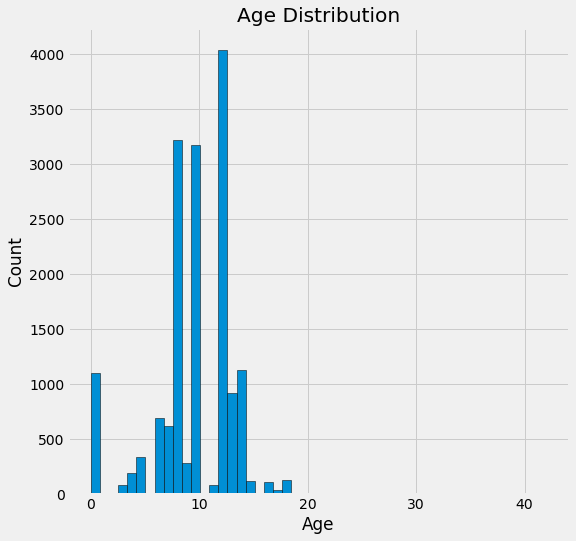

In [21]:
figsize(8, 8)

# Histogram of Age
plt.style.use('fivethirtyeight')
plt.hist(game_stats['Age'].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('Age'); plt.ylabel('Count'); 
plt.title('Age Distribution');

In [22]:
game_stats['Age'].value_counts()

12    4035
8     3221
10    3171
14    1127
0     1099
13     924
6      696
7      618
5      340
9      280
4      197
18     133
15     119
16     115
3       88
11      81
17      35
2        9
21       8
26       1
25       1
1        1
42       1
Name: Age, dtype: int64

In [23]:
game_stats[game_stats['Age']==42]

,Name,Rank,ID,Year Published,Min Players,Max Players,Playing Time,Min Playing Time,Max Playing Time,Owned,...,Thematic Rank,Strategy Game Rank,Game Artists,Num Players Not Recommended,War Game Rank,Customizable Rank,Abstract Game Rank,Family Game Rank,Party Game Rank,Children's Game Rank
5216,South African Railroads,5217,97683,2011,3,6,40,40,40,96,...,NaN,NaN,[],"[1, 2]",NaN,NaN,NaN,NaN,NaN,NaN


<b> Conclusion </b>

Most games can be played by kids above 8 years of age.

### Games Domain Distribution

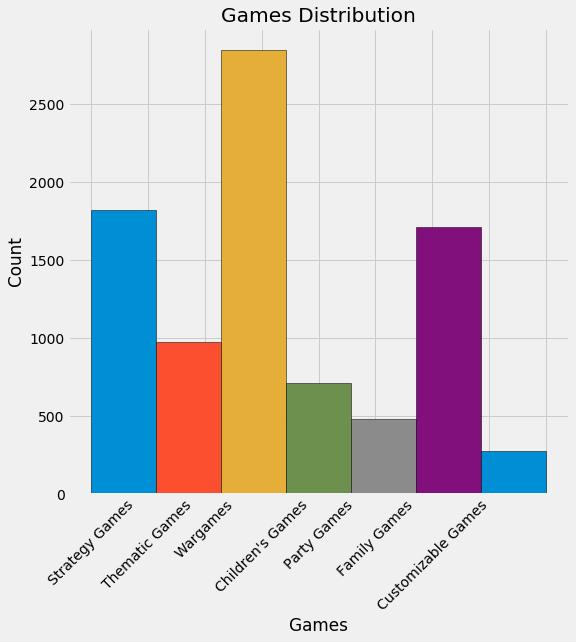

In [24]:
labels = ['Strategy Games', 'Thematic Games', 'Wargames', "Children's Games",
          'Party Games', 'Family Games', 'Customizable Games']
plt.hist([game_stats[game_stats['Strategy Games']==True]['Strategy Games'],
          game_stats[game_stats['Thematic Games']==True]['Thematic Games'],
          game_stats[game_stats['Wargames']==True]['Wargames'],
          game_stats[game_stats["Children's Games"]==True]["Children's Games"],
          game_stats[game_stats['Party Games']==True]['Party Games'], 
          game_stats[game_stats['Family Games']==True]['Family Games'], 
          game_stats[game_stats['Customizable Games']==True]['Customizable Games']], 
          bins = 1, edgecolor = 'k', label = labels);
plt.xlabel('Games'); plt.ylabel('Count'); 
plt.xticks((0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4),labels,rotation=45);
plt.title('Games Distribution');

<b> Conclusion </b>

In the top ranking games, Wargames are the most popular, followed by Strategy Games and Family Games.

In [25]:
game_stats.columns
# Index(['Min Players', 'Max Players',
#        'Min Playing Time', 'Max Playing Time', 'Owned',
#        'Users Rated', 'Average Rating', 'Bayes Average Rating',
#        'Comments', 'Wishing', 'NumWeights', 'Wanting',
#        'Trading', 'Video Games',
#        'Secondary Publishers', 'Num Players Recommended', 'Num Players Best',
#        'Num Players Not Recommended'],

#        'Language Dependence', 'Suggested Player Age',
#        'Game Categories', 'Game Mechanics', 'Game Designers', 'Game Family', Game Artists'

Index(['Name', 'Rank', 'ID', 'Year Published', 'Min Players', 'Max Players',
       'Playing Time', 'Min Playing Time', 'Max Playing Time', 'Owned',
       'Users Rated', 'Average Rating', 'Bayes Average Rating', 'Age',
       'Complexity Rating', 'Comments', 'Wishing', 'NumWeights', 'Wanting',
       'Trading', 'Video Games', 'Std Deviation', 'Publisher',
       'Secondary Publishers', 'Num Players Recommended', 'Num Players Best',
       'Language Dependence', 'Suggested Player Age', 'Game Domains',
       'Customizable Games', 'Thematic Games', 'Family Games',
       'Children's Games', 'Party Games', 'Strategy Games', 'Wargames',
       'Game Categories', 'Game Mechanics', 'Game Designers', 'Game Family',
       'Thematic Rank', 'Strategy Game Rank', 'Game Artists',
       'Num Players Not Recommended', 'War Game Rank', 'Customizable Rank',
       'Abstract Game Rank', 'Family Game Rank', 'Party Game Rank',
       'Children's Game Rank'],
      dtype='object')

### Year Published Distribution

[-4000. -3000. -2000. -1000.     0.  1000.  2000.  3000.]


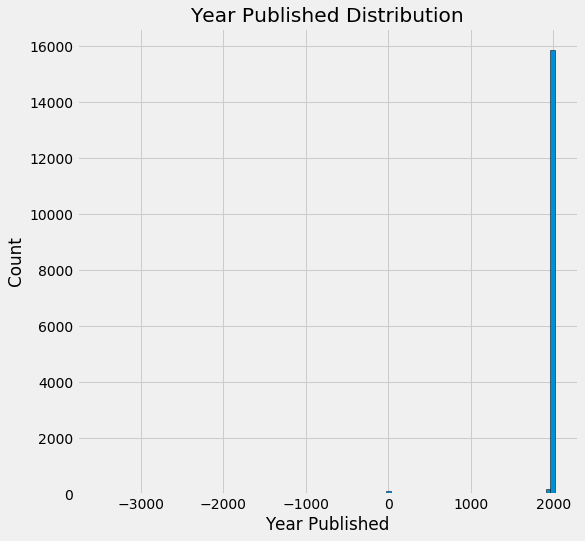

In [26]:
plt.hist(game_stats['Year Published'], bins = 100, edgecolor = 'k');
plt.xlabel('Year Published'); plt.ylabel('Count'); 
plt.title('Year Published Distribution');
loc,labels=plt.xticks()
print(loc)

There seems to be something weird happening in this graph with the distribution going as far as -3000. Let's explore it further.

In [27]:
min(game_stats['Year Published'])

-3500

In [77]:
# Copy this for other distributions as well
types = game_stats['Year Published'].value_counts()
types = list(types[types.values > 70].index)
types

[2016,
 2017,
 2015,
 2014,
 2013,
 2012,
 2018,
 2011,
 2010,
 2009,
 2008,
 2005,
 2007,
 2006,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1995,
 1996,
 1992,
 1993,
 1994,
 1991,
 1986,
 1981,
 1990,
 0,
 1987,
 1989,
 1985,
 1988,
 1979,
 1980,
 1982,
 1983,
 1975,
 1977,
 1984,
 1978]

Board games as far as -3500 BC have been added to the rankings. 

Let's focus on games within 1980 to 2018 to see how many games were published in this period.

In [28]:
game_stats[(game_stats['Year Published']>1980) & (game_stats['Year Published']<2018)]['Year Published'].value_counts()

2016    1073
2017    1012
2015    1006
2014     885
2013     787
2012     757
2011     677
2010     638
2009     594
2008     547
2005     517
2007     504
2006     487
2004     462
2003     394
2002     311
2001     285
2000     274
1999     258
1998     227
1997     211
1995     209
1996     201
1992     188
1993     170
1994     168
1991     162
1986     141
1981     140
1990     136
1987     126
1989     122
1985     122
1988     121
1982     110
1983     110
1984      87
Name: Year Published, dtype: int64

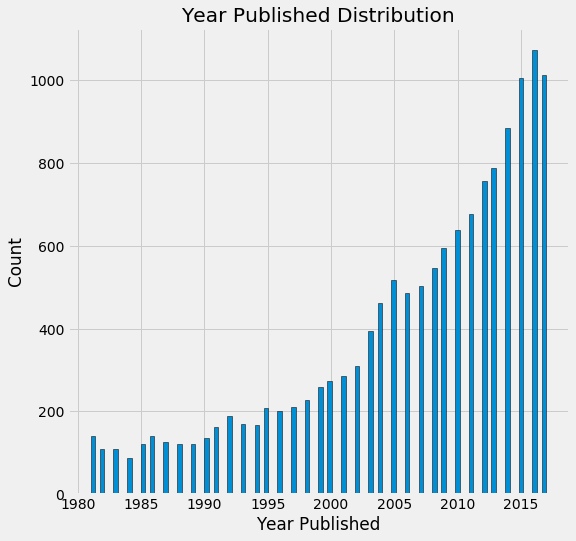

In [29]:
plt.hist(game_stats[(game_stats['Year Published']>1980) & (game_stats['Year Published']<2018)]['Year Published']
         , bins = 100, edgecolor = 'k');
plt.xlabel('Year Published'); plt.ylabel('Count'); 
plt.title('Year Published Distribution');

Top rankings games published within the last 40 years have been steadily increasing. 

### Complexity Rating Distribution

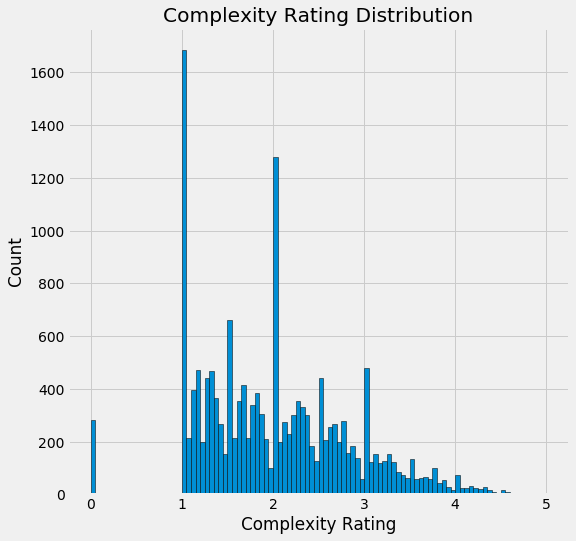

In [30]:
plt.hist(game_stats['Complexity Rating'], bins = 100, edgecolor = 'k');
plt.xlabel('Complexity Rating'); plt.ylabel('Count'); 
plt.title('Complexity Rating Distribution');

Games with a complexity rating of 1 are the most popular followed by a rating of 2. Popularity decreases as the complexity rating increases.

### Std Deviation Distribution

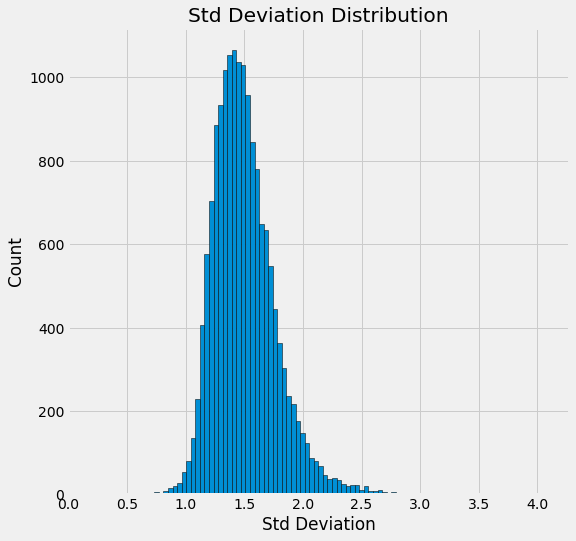

In [31]:
plt.hist(game_stats['Std Deviation'], bins = 100, edgecolor = 'k');
plt.xlabel('Std Deviation'); plt.ylabel('Count'); 
plt.title('Std Deviation Distribution');

Wrtie text here

### Publisher Distribution

In [34]:
game_stats['Publisher'].value_counts()

(Self-Published)                        376
Hasbro                                  320
(Web published)                         277
GMT Games                               233
Decision Games (I)                      228
AMIGO                                   219
999 Games                               218
Asmodee                                 199
The Avalon Hill Game Co                 196
Ravensburger Spieleverlag GmbH          192
SPI (Simulations Publications, Inc.)    173
KOSMOS                                  172
(Public Domain)                         167
ABACUSSPIELE                            136
Alderac Entertainment Group             127
3W (World Wide Wargames)                122
Mattel                                  119
Fantasy Flight Games                    111
Queen Games                             111
HABA - Habermaaß GmbH                   103
Eagle-Gryphon Games                     102
(Unknown)                                96
Games Workshop Ltd.             

<b> Conclusion </b>

Hasbro appears to be 'monopoly'-sing the publishing of number of top ranking games. Bad pun intended.

### Playing Time Distribution

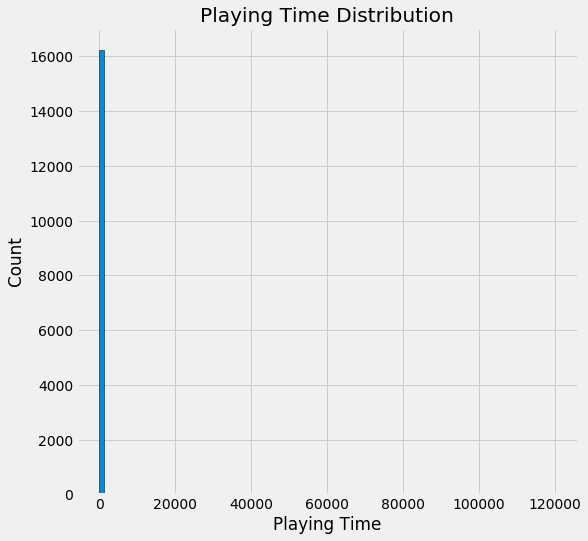

In [36]:
plt.hist(game_stats['Playing Time'], bins = 100, edgecolor = 'k');
plt.xlabel('Playing Time'); plt.ylabel('Count'); 
plt.title('Playing Time Distribution');

Again there appears to be anomalous behaviour

In [59]:
game_stats['Playing Time'].value_counts()

30        2942
60        2380
45        1689
20        1614
120       1320
90        1266
15         930
180        664
10         630
0          598
240        446
40         329
360        299
25         166
300        134
75         130
5          110
150        105
50          88
35          58
480         40
100         35
80          31
600         26
70          24
1           23
720         17
1200        16
210         13
420         11
          ... 
2100         1
85           1
165          1
39           1
280          1
660          1
60000        1
14400        1
95           1
8            1
700          1
38           1
1080         1
290          1
120000       1
5400         1
22500        1
19           1
42           1
115          1
750          1
68           1
2480         1
108          1
33           1
23           1
17           1
222          1
340          1
999          1
Name: Playing Time, Length: 99, dtype: int64

In [69]:
len(game_stats[game_stats['Playing Time']>120])

1883

<b> Conclusion </b>

More than half of the games can be played within less than an hour.

About 90% of the games have a playing time of 2 hours or less.

In [57]:
game_stats_temp = game_stats[game_stats['Playing Time']>120]

TypeError: 14 is not a string

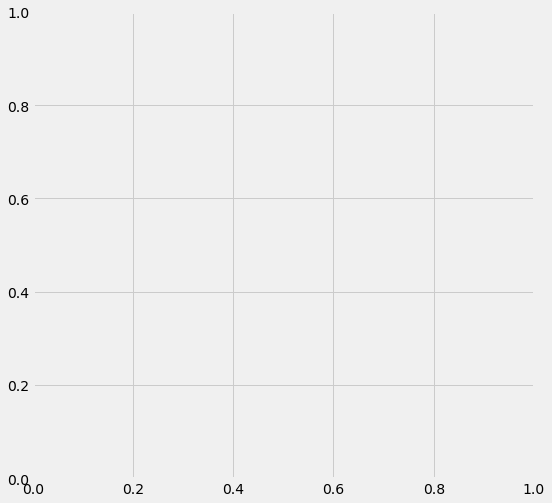

In [58]:
# Why am I getting this error?
plt.hist(game_stats_temp, bins = 100, edgecolor = 'k');
plt.xlabel('Playing Time'); plt.ylabel('Count'); 
plt.title('Playing Time Distribution');